In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
from skimpy import clean_columns

rcParams["figure.figsize"] = (12,12)
%matplotlib inline

sns.set()

In [2]:
# Load data
fert = pd.read_csv("pcos_fertility.csv")
infert = pd.read_excel("pcos_no_infertility.xlsx", sheet_name="Full_new")

In [3]:
fert.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [4]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [7]:
infert.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [8]:
infert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [9]:
pcos = infert.merge(fert, on="Sl. No",suffixes=("_x","_y"), how="left")
pcos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No                    541 non-null    int64  
 1   Patient File No._x        541 non-null    int64  
 2   PCOS (Y/N)_x              541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

In [10]:
#column name clean up
pcos_clean = clean_columns(pcos)


50 column names have been cleaned

In [11]:
[x for x in pcos_clean.columns if pcos_clean[x].isnull().sum() > 0]

['marraige_status_yrs', 'fast_food_y_n', 'unnamed_44']

In [12]:
pd.DataFrame({"Null": pcos_clean.isnull().sum(), "%Null" : (pcos_clean.isnull().sum()/pcos_clean.shape[0])*100})

,Null,%Null
sl_no,0,0.000000
patient_file_no_x,0,0.000000
pcos_y_n_x,0,0.000000
age_yrs,0,0.000000
weight_kg,0,0.000000
height_cm,0,0.000000
bmi,0,0.000000
blood_group,0,0.000000
pulse_rate_bpm,0,0.000000
rr_breaths_min,0,0.000000


In [16]:
pcos_clean.drop("unnamed_44", axis=1, inplace=True) # drop "Unnamed_44"

In [17]:
#columsn in _x and _y that are similar
#  
def equal_cols(col_1, col_2):
    if pcos_clean[col_1].equals(pcos_clean[col_2]):
        return (f"{col_1} and {col_2} are equal")
    else:
        return f"{col_1} and {col_2} are not equal"    

print(equal_cols("pcos_y_n_x","pcos_y_n_y"))
print(equal_cols("i_beta_hcg_m_iu_m_l_x","i_beta_hcg_m_iu_m_l_y"))
print(equal_cols("ii_beta_hcg_m_iu_m_l_x","ii_beta_hcg_m_iu_m_l_y"))
print(equal_cols("amh_ng_m_l_x","amh_ng_m_l_y"))


pcos_y_n_x and pcos_y_n_y are equal
i_beta_hcg_m_iu_m_l_x and i_beta_hcg_m_iu_m_l_y are equal
ii_beta_hcg_m_iu_m_l_x and ii_beta_hcg_m_iu_m_l_y are not equal
amh_ng_m_l_x and amh_ng_m_l_y are not equal


In [18]:
# removing columns that are equal as well as those from the y-dataset
pcos_clean.drop(["pcos_y_n_y","i_beta_hcg_m_iu_m_l_y","patient_file_no_y","ii_beta_hcg_m_iu_m_l_x",
                "amh_ng_m_l_y","patient_file_no_x"], axis = 1, inplace=True)

In [20]:
#missing values
for col in ["marraige_status_yrs","fast_food_y_n"]:
    pcos_clean[col].fillna(pcos_clean[col].mode()[0], inplace = True)

In [21]:
pcos_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,541.0,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
pcos_y_n_x,541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
age_yrs,541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
weight_kg,541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
height_cm,541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
bmi,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
blood_group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
pulse_rate_bpm,541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
rr_breaths_min,541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
hb_g_dl,541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000


In [22]:
pcos_clean["cycle_r_i"].value_counts()

pcos_clean["cycle_r_i"].replace(5, 4, inplace=True)

In [23]:
pcos_clean.columns

Index(['sl_no', 'pcos_y_n_x', 'age_yrs', 'weight_kg', 'height_cm', 'bmi',
       'blood_group', 'pulse_rate_bpm', 'rr_breaths_min', 'hb_g_dl',
       'cycle_r_i', 'cycle_length_days', 'marraige_status_yrs', 'pregnant_y_n',
       'no_of_aborptions', 'i_beta_hcg_m_iu_m_l_x', 'fsh_m_iu_m_l',
       'lh_m_iu_m_l', 'fsh_lh', 'hip_inch', 'waist_inch', 'waist_hip_ratio',
       'tsh_m_iu_l', 'amh_ng_m_l_x', 'prl_ng_m_l', 'vit_d_3_ng_m_l',
       'prg_ng_m_l', 'rbs_mg_dl', 'weight_gain_y_n', 'hair_growth_y_n',
       'skin_darkening_y_n', 'hair_loss_y_n', 'pimples_y_n', 'fast_food_y_n',
       'reg_exercise_y_n', 'bp_systolic_mm_hg', 'bp_diastolic_mm_hg',
       'follicle_no_l', 'follicle_no_r', 'avg_f_size_l_mm', 'avg_f_size_r_mm',
       'endometrium_mm', 'ii_beta_hcg_m_iu_m_l_y'],
      dtype='object')

In [24]:
# convert to category
cat_cols = ['pcos_y_n_x','blood_group','cycle_r_i','pregnant_y_n','weight_gain_y_n',
       'hair_growth_y_n', 'skin_darkening_y_n', 'hair_loss_y_n', 'pimples_y_n','fast_food_y_n', 'reg_exercise_y_n']

for col in cat_cols:
    pcos_clean[col] = pcos_clean[col].astype("category")


In [25]:
pcos_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   sl_no                   541 non-null    int64   
 1   pcos_y_n_x              541 non-null    category
 2   age_yrs                 541 non-null    int64   
 3   weight_kg               541 non-null    float64 
 4   height_cm               541 non-null    float64 
 5   bmi                     541 non-null    float64 
 6   blood_group             541 non-null    category
 7   pulse_rate_bpm          541 non-null    int64   
 8   rr_breaths_min          541 non-null    int64   
 9   hb_g_dl                 541 non-null    float64 
 10  cycle_r_i               541 non-null    category
 11  cycle_length_days       541 non-null    int64   
 12  marraige_status_yrs     541 non-null    float64 
 13  pregnant_y_n            541 non-null    category
 14  no_of_aborptions        54

### EDA

Questions to Answer

What are the factors associated with PCOS?

* Lifestyle - Exercise, Fast Foods and BMI.
* Secondary - Hip to waist ration, regular cycles and cycle lenght, hirsuitism and acne, Weight gain, Blood Pressure.
* Primary - No of follicles and follicle size, FSH and  LH, HCG Levels(Human Chronic Gonadritophic),TSH(Thyroid Stimulating Hormone),AMH(Anti Mullerina Hormone),High Prolactin, Random Blood Sugar(RBS)

* Hypo or Hyperthyroidism can affect both FSH,lh and Prolactin, Affect Insulin Sensitivity

* There are Primary and Secondary syptoms that are used to diagnose patients with PCOS. I will explore the primary and secondary syptoms as well as the lifestyle of patients in this study

In [26]:
#lifestyle
lstly =  pcos_clean[["fast_food_y_n","reg_exercise_y_n","pcos_y_n_x","bmi","age_yrs"]]

#primary
sec_stmp = pcos_clean[['cycle_r_i', 'cycle_length_days','pregnant_y_n','waist_hip_ratio','hair_growth_y_n',
           'skin_darkening_y_n', 'hair_loss_y_n', 'pimples_y_n','pcos_y_n_x']]

#secondary
prmy_stmp = pcos_clean[['blood_group','i_beta_hcg_m_iu_m_l_x', 'ii_beta_hcg_m_iu_m_l_y','fsh_lh','tsh_m_iu_l', 'amh_ng_m_l_x', 'prl_ng_m_l',
                            'vit_d_3_ng_m_l', 'prg_ng_m_l', 'rbs_mg_dl','bp_systolic_mm_hg','bp_diastolic_mm_hg', 'follicle_no_l',
                             'follicle_no_r','avg_f_size_l_mm', 'avg_f_size_r_mm', 'endometrium_mm','pcos_y_n_x']]

                      

##### Lifestyle

In [27]:
lstly.columns

Index(['fast_food_y_n', 'reg_exercise_y_n', 'pcos_y_n_x', 'bmi', 'age_yrs'], dtype='object')

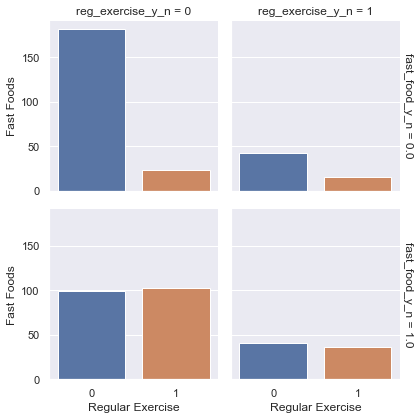

In [23]:
#lstly.groupby(["fast_food_y_n","reg_exercise_y_n","pcos_y_n_x"], as_index=False).size().sort_values(by = "size",ascending = False)

g1 = sns.FacetGrid(lstly, row = "fast_food_y_n", col = "reg_exercise_y_n",hue = "pcos_y_n_x",margin_titles=True)
g1.map(sns.countplot, "pcos_y_n_x", order = [0,1])
g1.set_axis_labels("Regular Exercise", "Fast Foods")


* Diagnosed with PCOS - $33.73\%$ : 
* Is diet a predictor in PCOS?.Individuals who do not take fast foods and do not exercise regularyly and do not have PCOS are six time individuals that have PCOS.
* Health vs PCOS individuals numbers not significantly different in the group that does not exercise regularly and take fast food.The same similarrity is witnessed in the geoup that exercie regularly but take fast foods, however individuals in this group are twice the number in the former.


Text(0.5, 1.0, 'BMI Distribution')

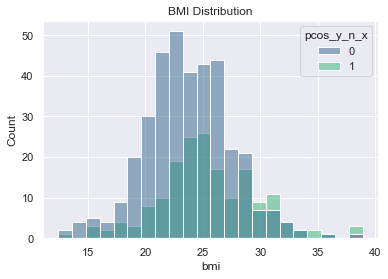

In [34]:
#bmi and pcos
sns.histplot(x = "bmi", hue = "pcos_y_n_x",data = lstly, palette="viridis")
plt.title("BMI Distribution")

*Distribution on BMI is approximately normal. Most of the women that participated in the study were of normal weight

Text(0.5, 1.0, 'BMI and PCOS')

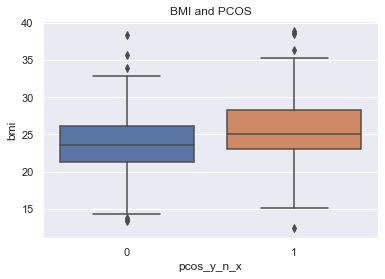

In [35]:
sns.boxplot(data = lstly, x = "pcos_y_n_x", y = "bmi")
plt.title("BMI and PCOS")

* On average, the BMI of individuals with pcos is higher than that of those who do not have pcos.
* We have both overweight and underweight individuals for both the categories with individuals with no pcos having a higher BMI margin comparede to those diagnosed with PCOS

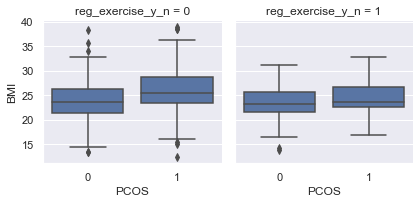

In [38]:
g2 = sns.FacetGrid(lstly, col = "reg_exercise_y_n",margin_titles=True)
g2.map(sns.boxplot, "pcos_y_n_x", "bmi", order = [0,1])
g2.set_axis_labels("PCOS", "BMI")

* On Average, the BMI of individuals who exercise regularly is lower for both PCOS and healthy individuals compared to those who do not exercise.There is also a lower margin in BMI fot individuals who exercise regularly compared to those who do not.

#### Secondary

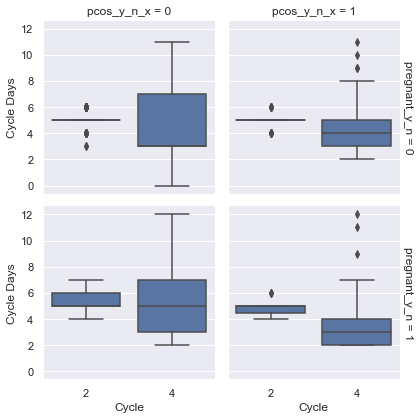

In [28]:
g3 = sns.FacetGrid(sec_stmp, col = "pcos_y_n_x", row = "pregnant_y_n",margin_titles=True)
g3.map(sns.boxplot, "cycle_r_i", "cycle_length_days",order = [2,4])
g3.set_axis_labels("Cycle","Cycle Days")

* cycle length days for healty individuals who have not been pregant is skewed to the left with individuals with an irregular cycle having a large range. FOr customers who have been pregnant before, on average cycle days for healthy individuals with irregular cycle is lower than that pg those who have a regular cycle


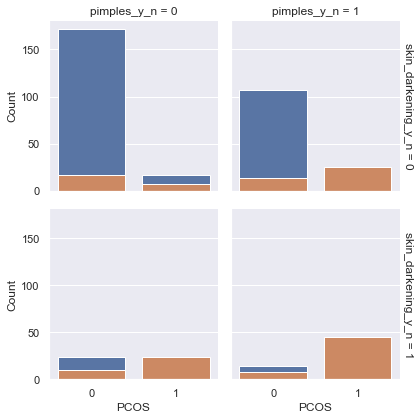

In [30]:
g4 = sns.FacetGrid(sec_stmp, col = "pimples_y_n", row = "skin_darkening_y_n", hue = "hair_growth_y_n",margin_titles=True)
g4.map(sns.countplot,"pcos_y_n_x",order = [0,1])
g4.set_axis_labels("PCOS","Count")

* Healthy patients are nine times the number of individuals who have not had pimples or skin darkening.
* Of individuals with pcos,a third of the individuals experienced skin darkening and pimples.

#### Primary Symptoms

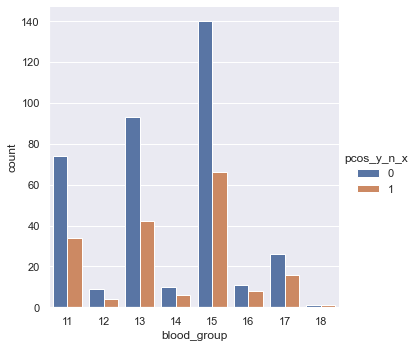

In [39]:
sns.catplot(data = prmy_stmp, x = "blood_group", hue = "pcos_y_n_x", kind = "count")
#A+ = 11,A- = 12,B+ = 13,B- = 14,O+ =15,O- = 16,AB+ =17,AB- = 18			


* Individuals with 0+ and B+ account for 63% of patients

In [43]:
prmy_stmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   blood_group             541 non-null    category
 1   i_beta_hcg_m_iu_m_l_x   541 non-null    float64 
 2   ii_beta_hcg_m_iu_m_l_y  541 non-null    float64 
 3   fsh_lh                  541 non-null    float64 
 4   tsh_m_iu_l              541 non-null    float64 
 5   amh_ng_m_l_x            541 non-null    object  
 6   prl_ng_m_l              541 non-null    float64 
 7   vit_d_3_ng_m_l          541 non-null    float64 
 8   prg_ng_m_l              541 non-null    float64 
 9   rbs_mg_dl               541 non-null    float64 
 10  bp_systolic_mm_hg       541 non-null    int64   
 11  bp_diastolic_mm_hg      541 non-null    int64   
 12  follicle_no_l           541 non-null    int64   
 13  follicle_no_r           541 non-null    int64   
 14  avg_f_size_l_mm         54

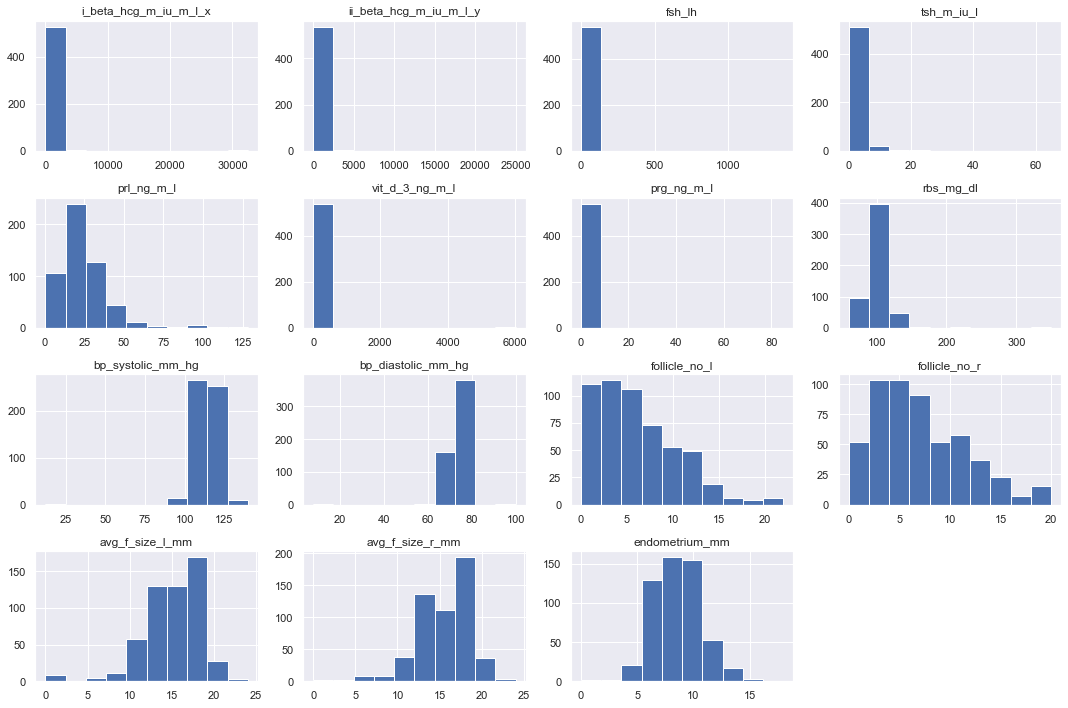

In [44]:
prmy_stmp.hist(bins = 10, figsize = (15,10), layout = (-1,4))
plt.tight_layout()

* Levels of the Human Chorionic Gonadotropin(HCG) Hormone are significantly low, very close to zero.
* The ratio of FSH to LH is also close to zero. This is because range for healthy women is between 1 and 2 and 3-8 for women with PCOS.
* Levels of Testesterone Stimulating Hormone(TSH) are less that 25(mIu/ml).There are therfore individuals with very high testesterone levels.
* Prolactin levels are skewed to the right.For healthy women the normal range 25ng/ml or less.
* Levels of vitamin D3 are so close to zero.
* Projesterone lecels are significantly low, very close to zero.
* Resting blood sugar levels are skewed to the right.
* Systolic and Diastolic blood pressure are within the normal ranges
* Number of follicles on both the left and right ovaries are skewed to the right.More than 12 indicate PCOS.
* Follicle sizes are skewed to the left. Sizes of the follicles are larger than normal range (6-9)mm
* The endometrium is thicker for most of participants in the study

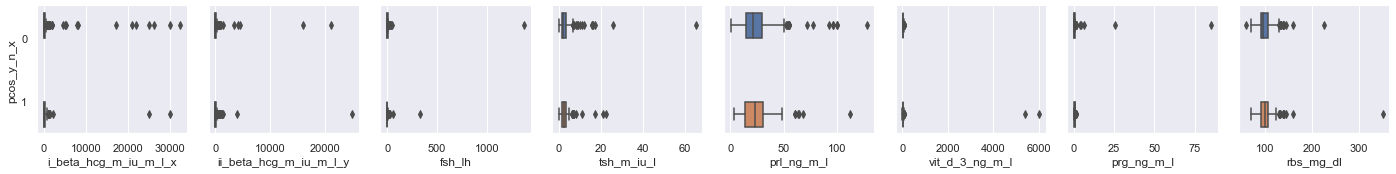

In [34]:
g5 = sns.PairGrid(prmy_stmp, y_vars = ["pcos_y_n_x"], x_vars=['i_beta_hcg_m_iu_m_l_x', 'ii_beta_hcg_m_iu_m_l_y','fsh_lh', 'tsh_m_iu_l', 
                    'prl_ng_m_l', 'vit_d_3_ng_m_l','prg_ng_m_l', 'rbs_mg_dl'],hue = "pcos_y_n_x")
g5.map(sns.boxplot)                  

* Data present is skewed.